<hr style="border-top-width:4px; border-top-color: #ff0000">
<img align="left" src="./Data/Logo_Unipd.jpg" alt="Drawing" style="width: 500px"/>
<img align="right" src="./Data/Logo_POD.jpg" alt="Drawing" style="width: 220px"/>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>


# Advanced Statistics for Physichs Analysis,  2020/2021


# **LEARNING THE TOPOLOGY OF A BAYESIAN NETWORK FROM A DATABASE <br> OF CASES USING THE K2-ALGORITHM**

Authors:
* Francesco Fontana:  $ \qquad     2026924$  
* Daniele Mellino:    $ \qquad\quad \,\, 2013373$ 
<hr style="border-top-width:4px; border-top-color: #ff0000;">

<script>
     $.getScript('https://kmahelona.github.io/ipython_notebook_goodies/ipython_notebook_toc.js')
 <\script>


In [1]:
%%javascript
$.getScript('https://kmahelona.github.io/ipython_notebook_goodies/ipython_notebook_toc.js')

<IPython.core.display.Javascript object>

# **Table of Contents**
$$ \\ $$

<div id="toc"></div>

# **Introduction**
## *Bayesian belief Network*
<img align="right" src="Data/bayesian.jpg" alt="Drawing" style="width: 250px"/>

A Bayesian belief network $\textbf{B}$, is a probabilistic graphical model that represents a set of variables and their conditional dependencies via a directed acyclic graph (DAG).<br>
This model is composed of two parts : a structure and a conditional probabilities model.

* The $\textbf{Bayesian belief-network structure $B_s$}$ is a  DAG in which nodes represent domain variables and arcs between nodes represent probabilistic dependencies.<br> 

* The $\textbf{conditional probabilities $B_p$}$ are such that for each nodes there is a  conditional-probability function that relates this node to its immediate predecessors (parents) <br>

<br>

<hr style="border-top-width:4px; border-top-color: #f0ffff;">

### *Example: Burglar Alarm:*

Let's show the Bayesian network through an example.

<br>
$\textbf{Situation:}$
<br>

Harry installed a new burglar alarm at his home to detect burglary. The alarm reliably responds at detecting a burglary but also responds for minor earthquakes. Harry has two neighbors David and Sophia, who have taken a responsibility to inform Harry at work when they hear the alarm. David always calls Harry when he hears the alarm, but sometimes he got confused with the phone ringing and calls at that time too. On the other hand, Sophia likes to listen to high music, so sometimes she misses to hear the alarm. <br>
Suppose we would like to compute the probability that both David and Sophia call given that there was a burglar $P(B|D,S)$.

<img align="center" src="Data/burglar.png" alt="Drawing" style="width: 0.4"/>

We can rewrite it as : 

$$P(B|D,S) = \dfrac{P(B,D,S)}{P(B,D,S)+P(\bar{B},D,S)}$$

Where $P(B,D,S)$ can be expanded, through the product rule to : 

$$P(B,D,S)=\sum_{all E}\sum_{all A} P(B)P(E)P(A|B,E)P(D|A)P(S|A)$$

As we can see, given a bayesian network is relatively easy infer something about the domain variables.<br>
The real problem is to **build those networks**. In fact, it **require a lot of computation**, which scale exponentially with the number of nodes .<br>

<hr style="border-top-width:4px; border-top-color: #f0ffff;">

### *Paper example:*
In general we would like to build this kind of model starting from a database as the *table 1*, in which we have a set of cases/measurement and the relative observed value of the variable.<br>
<img align="center" src="Data/table1_pap.png" alt="Drawing" style="width: 0.4"/>

<br>
<img align="right" src="Data/Bs1.png" alt="Drawing" style="width: 1.5"/>
Given that we would like to estimate the more probable structure $B_s$.<br>
Suppose we found the one in the figure on the right.<br>
The last thing we want to do is compute the relative conditional probabilities $B_p$
<img align="center" src="Data/Bp1_v2.png" alt="Drawing" style="width: 0.4"/>



### Goal : Implement the K2 algorithm in R, and test its behaviour on the ALARM and Asia datasets. 

<hr style="border-top-width:4px; border-top-color: #f0ffff;">



## *Theory and K2 algorithm*

Let's tackle the problem of $\textbf{finding the most probable belief-network structure}$. After that one can derive the probabilities from the database and infer something like $P(x_3 = present | x_1 = present)$ or are my neighbours reliable (refering to the first example)<br>

Given a dataset $D$ and two possible structures $B_{S_i}$ and $B_{S_j}$, we can choose the more probable, through their posterior probabilities ratio (*posterior odds ratio*):

$$\dfrac{P(B_{S_i}|D)}{P(B_{S_j}|D)} = \dfrac{P(B_{S_i},D)}{P(B_{S_j},D)} $$

So we want to compute the joint probability to obtain a structure  $B_{S}$ after having our dataset $D$: $P(B_S,D)$ <br>

### Theorem and assumptions
To do that we make the following assumption: 

> ***1)*** ***The database variables are discrete***

It means that we can write: 

$$P(B_S,D)= \int_{B_P} \,P(D |B_S, B_P)\,  f (B_P|B_S) \, P(B_S)\, dB_P  \newline
       =P(B_S)\int_{B_P}\,P(D |B_S, B_P) \,f(B_P|B_S)\,dB_P$$

- $B_P$ is a vector whose values denote the *conditional-probability assignments* associated with belief-network structure $B_S$.
- $f$ is the conditional-probability density function over $B_P$ given $B_S$ 

- The integral is over all possible value assignments to $B_P$; so it' s a multiple integral over the conditional probabilities associated with $B_S$


- **PRO**: This assumptions is usefull cause allow us to use the mass function $P(D |B_S, B_P)$ rather than the density function $f(D |B_S, B_P)$

**Paper example:** Suppose we have $B_{S_1}$, in that case $B_{P_1}$ is only a possible configuration, with the integration we are kind of changing the number in that *table2* to all the possible values that respect the probability theory.

> ***2)*** ***Cases occur independently, given a  belief-network model***

This is the analogous of saying that we need indipendent measures. Using that we can rewrite the mass function as:

$$P(D |B_S, B_P) = \prod_{h=1}^{m} P(C_h|B_S,B_P)$$

- $m$ = number of cases
- $C_h$ = $h$*-esim* case in $D$

>  ***3)*** ***There are no cases that have variables with missing values***

In other words we don't want holes in our dataset.

> ***4)*** ***The density $f(B_P|B_S)$ is uniform***

We are requiring that before we observe our data, given a structure  we have no clue on which connections will be stronger, it's a sort of uninformative prior for semplifying the calculation.


<hr style="border-top-width:4px; border-top-color: #f0ffff;">

**Theorem :**

> Given the above assumption it follows that: 
$$P(B_S,D)=P(B_S)\prod^n_{i=1}\prod_{j=1}^{q_i} \dfrac{(r_i-1)!}{(N_{ij}+r_i -1)!}\prod^{r_i}_{k=1} \alpha_{ijk}$$
--------------------------------------------------

where: 
- $n$ = number of nodes
- $r_i$ = number of the possible values of the node i
- $q_i$ = number of possible instantiation of the parents
- $\alpha_{ijk}$= number of cases in D in which $x_i$ assume the $k$*-esim* value and its parents assume the $j$*-esim* configuration.

 
<hr style="border-top-width:4px; border-top-color: #f0ffff;">

Now that we can compute the probability of a given structure, one could think to compute the probabilities of all the possible structures and then choose the biggest one.

**That' s not easy.** The number of possible structures scales exponentially with the number of nodes. 
It grows like :
$$f(n)=\sum_{i=1}^{n} (-1)^{i+1}\binom{n,i} 2^{i(n-i)}f(n-i)$$

For instance, 5 nodes has $29000$ possible structures, while for 10 nodes it's  about $4.2 \times10^{18}$.

-----------------------------
**Semplification 1** 
> we assume that we can specify an ***ordering*** of all the nodes such that , if $x_i$ precedes $x_j$, then we do not allow structures in which there is an arc from $x_j$ to $x_i$.

In this way for n=10 we have $3.5 \times10^{13}$ structures.
Still a huge number. Therefore we semplify again the problem :

**Semplification 2** 
> we assume ***constant prior probability***, $P(B_S)$, for each $B_S$.<br>Thus we have:
$$P(B_S,D)=c \prod^n_{i=1}\prod_{j=1}^{q_i} \dfrac{(r_i-1)!}{(N_{ij}+r_i -1)!}\prod^{r_i}_{k=1} \alpha_{ijk}$$

Here we can see that for maximizing this equation we need to find the set of parents, let's call it $\pi_i$ that maximizes the second inner product.

$$\max_{B_S}[P(B_S,D)]=c \prod^n_{i=1}\max_{\pi_i}\bigg[\prod_{j=1}^{q_i} \dfrac{(r_i-1)!}{(N_{ij}+r_i -1)!}\prod^{r_i}_{k=1} \alpha_{ijk}\bigg]$$

*Notice* : the set of parents is constrained by Semplification 1

**Semplification 3**
> In order to save computational power, we fix the number of possible parents a node can have to a ***value u***.

It makes sense because in general we would not expect that one nodes would depend *directly* from all the previous in the ordering.

<hr style="border-top-width:4px; border-top-color: #f0ffff;">

### K2 algorithm
Given the assumption above, the authors of the paper come out with an algorithm that follows the problem-solving heuristic of making the locally optimal choice (**greedy**) in order to maximize $P(B_S,D)$. <br>

As we can understand from the last formula, what they maximized is: 

$$g(i,\pi_i) = \prod_{j=1}^{q_i} \dfrac{(r_i-1)!}{(N_{ij}+r_i -1)!}\prod^{r_i}_{k=1} \alpha_{ijk} $$

What K2 algorithm does is *starting with the assumption that a node has no parents*, then *add at each step the parents whose addition most increase the probability (one at the time)*. When the addition of no single parent can increase the probability, it stop and change the node.



<img align="center" src="Data/pseudocode2.png" alt="Drawing" style="width: 0.6"/>


<hr style="border-top-width:4px; border-top-color: #f0ffff;">


### Inputs:
- A set of $n$ nodes
- An ordering on the nodes
- An upper bound $u$ on the number of parents a node may have
- A database $D$ containing $m$ cases

### Outputs:
- For each node, a printout of the parents of the node

# **K2 algorithm implementation**

## *Libraries used on R*

In [1]:
suppressMessages(library(tidyverse))
suppressMessages(library(bnstruct))
suppressMessages(library(Rgraphviz))
suppressMessages(library(qgraph))

# fig: function that allow to resize the plot quickly 
fig <- function(width, heigth){
     options(repr.plot.width = width, repr.plot.height = heigth) }

## *Inputs:*

In [2]:
# dataset
x1 <- c(1,1,0,1,0,0,1,0,1,0)    # classification target
x2 <- c(0,1,0,1,0,1,1,0,1,0)
x3 <- c(0,1,1,1,0,1,1,0,1,0)

names <- c("x1", "x2", "x3")    # names of the nodes

data <- data.frame(x1,x2,x3)
cat("DATABASE:\n\n")
print(data)

DATABASE:

   x1 x2 x3
1   1  0  0
2   1  1  1
3   0  0  1
4   1  1  1
5   0  0  0
6   0  1  1
7   1  1  1
8   0  0  0
9   1  1  1
10  0  0  0


In [3]:
n <- 3                          # number of nodes
Order <- c(1,2,3)               # ordering on the nodes
u <- 2                          # upper bound on the number of parents

m <- length(x1)                 # number of cases

Here we defined some variables to be used later on:

- $V_i$: list of all the possible values of the attribute $x_i$

- $r_i$: list of the cardinalities of $V_i$

In [4]:
# list of all possible values of the attribute xi(ordered)
V <- lapply(lapply(data,unique),sort )

# number of possible values for the attribute xi
r <- sapply(V,length)

## *Useful functions for computation:*

Here instead we have defined some usefull function for the K2 algorithm:
- $\phi_i$: list containing all the possible instantiations of the parents of $x_i$ in database $D$

- $q_i$: list of the cardinalities of $\phi_i$

In [5]:
#cartesian : Function that take in input the lists of the possible values of the parents
#            and return in a matrix all the possible instantiations of the parents (ordered)

cartesian <- function(mtx_inst) {
    #lwe make the cartesian product 
    AxB <- expand.grid(mtx_inst) 
    
    # we order it in from first to last column
    for (j in ncol(AxB):1){
        AxB <- suppressWarnings( AxB[order(AxB[j]),] )
    }
    
    return(as.matrix(AxB))
}

# ph: Function that takes in input the parents list and output a matrix
#     of all possible instantiations of the parents of xi in the database

ph <- function(parents){
    len_parents <- length(parents)
    #we use multiple if to optimize the computation
    if (len_parents == 0){
        ph <- 0
    }
    if (len_parents == 1){
        ph <- cbind(V[[parents]]) 
    }
    if (len_parents > 1){
        temp <- V[parents]
        ph <- cartesian(temp)
    }
    
    return (ph)
}

# q: Function that takes in input the list of parents and return the total number of possible
#    instantiations of the parents of xi in the database

q <- function(parents){
    ifelse(length(parents)>0, nrow(ph(parents)), 0)
}

- $\alpha_{ijk}$: function that returns the number of cases in $D$ in which the attribute $x_i$ is instantiated with its $k$*-esim* value, while the parents of $x_i$ ( $\pi_i$ ) are instantiated with the $j$*-esim* instantiation in $\phi_i$


- $N_{ij}=\sum_{k=1}^{r_i}\alpha_{ijk} $: function that performs the sum over $k$ of the $\alpha_{ijk}$;  It corresponds to the number of instances in the database $D$ in which the parents of $x_i$ ( $\pi_i$ ) are instantiated with the $j$*-esim* instantiation in $\phi_i$

In [6]:
# alpha : Given in input:
#         pi:the list of parents,
#         j: the index in which the parents of xi are instantiated (index j referred to phi)
#         k: k value for which xi is instantiated
#        return: the number of cases in which xi is instantiated with k and
#                the parents of xi are instantiated with its j value


alpha <- function(pi,i,j,k){
    phi <- ph(pi) #catch all the possible instantation of the parents
    
    # select the row in which node xi has its k value
    sub.sel <- data[data[,i] == V[[i]][k],] 
    
    #select parents of xi with its j value
    if (j>0){
        for (l in 1:length(pi)){
            sub.sel <- sub.sel[ sub.sel[ , pi[l]] == phi[j,l] , ] #keeping the rows that contains the selected instationtions
        }
    }
    
    return(nrow(sub.sel))
}

# N i,j: Given in input:
#        pi: the parents list of xi
#        i:  the subject node index
#        j:  j as above
#        return: the number of cases in which the parents of xi are instantiated with its j value

Nij <- function(pi,i,j){
    Nij <- 0
    for (k in 1:r[i]){ #for each  possible values of the attribute xi
        Nij <- Nij + alpha(pi,i,j,k)
    }

    return(Nij)
}

- $Pred(x_i)$: this simple function returns the set of nodes that precede $x_i$ in the node ordering

In [7]:
# Pred(xi): Given an index i ,returns the set of nodes that precede xi
pred <- function(i){
    return (head(Order, match(i,Order)-1))
}

## $g(i,\pi_i)$: probability of the database $D$ given that the parents of $x_i$ are $\pi_i$

Accordingly to we've introduced on the first part, we have to maximize the following function:

$$g(i,\pi_i) = \prod_{j=1}^{q_i} \frac{(r_i-1)!}{(N_{ij}+r_i-1)!} \prod_{k=1}^{r_i} \alpha_{ijk}!$$

Since the logarithm is a *monotic function*, instead of computing directly $g\,(i,\pi_i)$, we compute $ \log\,[\,g(i,\pi_i)\,]$ in order to save run-time computation.

$$\log \,[g(i,\pi_i)] =  \sum_{j=1}^{q_i} \log\,[\,(r_i-1)!\,] - \log\,[\,(N_{ij}+r_i-1)!\,] + \sum_{k=1}^{r_i} \log\,[\,\alpha_{ijk}!\,] \\
= \sum_{j=1}^{q_i} logfact[\,r_i-1\,] - logfact[\,N_{ij}+r_i-1\,] + \sum_{k=1}^{r_i} logfact[\,\alpha_{ijk}\,]$$

where $logfact$ is the logarithm of a factorial term.


**Notice:** we used the function "*lfactorial*" already present in library "*base*" in R to compute the $log$ of the factorial.

In [8]:
# log(g(i,pi)): Given: 
#               i: the subject node index,
#               pi: the list of parents
#               return: the computed logarithm of formula 12 in the reference

log_g <- function(i, pi){
    qi <- q(pi) #total number of possible instantiations of the parents of xi in the database
    
    sum <- 0
    
    # If list of parents is not empty
    if (qi>0){
        for (j in 1:qi){
            for (k in 1:r[i]){
                aijk <- alpha(pi,i,j,k)
                sum <- sum + lfactorial(aijk)
            }
            nij <- Nij(pi,i,j)
            sum <- sum + lfactorial(r[i]-1) - lfactorial(nij + r[i]-1)
        }
    }
    
    # If list of parents is empty
    if (qi==0){
        for (k in 1:r[i]){
            ai0k <- alpha(pi,i,0,k)
            sum <- sum + lfactorial(ai0k)
        }
        ni0 <- Nij(pi,i,0)
        sum <- sum + lfactorial(r[i]-1) - lfactorial(ni0 + r[i]-1)
    }
    
    return(sum)
}


## *Network conditional probability: $\quad \theta_{ijk} = p\,(\,x_i=\nu_{ik}\,|\,\pi_i=w_{ij}\,)$*
Here, we calculated the conditional probabilities.
We defined a function that returns the probability that node $x_i$ has value $\nu_{ik}$ <br> ($k$ from $1$ to $r_i$), given that the parents of $x_i$, represented by $\pi_i$, are instatiated as $w_{ij}$.

It could be obtained that:

$$\theta_{ijk} = \dfrac{\alpha_{ijk}+1}{N_{ij} + r_i} ; \qquad Var(\theta_{ijk}) = \dfrac{(\alpha_{ijk}+1) ( N_{ijk} + r_i -\alpha_{ijk}-1)}{(N_{ijk} + r_i)^2 (N_{ijk}+r_{i}+1) }$$


In [9]:
#theta:  Given: 
#         i: subject node index
#         pi: list of parents
#         return theta_{i,j,k} in the formula above

theta <- function(pi,i){
    
    if (length(pi)==0){
        theta <- matrix(0, 1, r[i] ) # matrix  dim:( 1 x (r[i]) ) full of zeros
        for (k in 1:r[i]){
            theta[1,k]<-(alpha(pi,i,0,k)+1)/(Nij(pi,i,0)+r[i])
        }       
    }
    
    if (length(pi)>0){
        theta <- matrix(0, q(pi), r[i] ) # matrix  dim:( r[i] x q[i] ) full of zeros
    for  (j in 1:q(pi)){
        for (k in 1:r[i]){
            theta[j,k]<-(alpha(pi,i,j,k)+1)/(Nij(pi,i,j)+r[i])
        }
    }
}
    return(signif(theta,2))
}

#variance  :  Given: 
#         i: subject node index
#         pi: list of parents
#         return var_{i,j,k} in the formula above

variance <- function(pi,i){
    
    if (length(pi)==0){
        var <- matrix(0, 1, r[i] )
       
        for (k in 1:r[i]){
            var[1,k] <- ( (alpha(pi,i,0,k)+1) * (Nij(pi,i,0) + r[i] - alpha(pi,i,0,k)-1)) /
                        ( (Nij(pi,i,0) + r[i]+1) * (Nij(pi,i,0) + r[i])^2 ) 
        }
    
    }
    
    if(length(pi)>0){
        var <- matrix(0, q(pi), r[i] )
    for (j in 1:q(pi)){
        for (k in 1:r[i]){
            var[j,k] <- ( (alpha(pi,i,j,k)+1) * (Nij(pi,i,j) + r[i] - alpha(pi,i,j,k)-1)) /
                        ( (Nij(pi,i,j) + r[i]+1) * (Nij(pi,i,j) + r[i])^2 ) 
        }
    }
        }
    
    return(signif(var,1))
}

#theta.print: Given: 
#         i: subject node index
#         pi: list of parents
#         it display the theta i,j,k and its variance

theta.print <- function(pi,i){
    if (length(pi)==0){
         for (k in 1:r[i]){
            cat( "P(",names[i],"=",V[[i]][k],
                    ") =",theta(pi,i)[1,k],"±", variance(pi,i)[1,k] ,"\n")
    }

        }
    
    if (length(pi)>0){ 
        for (j in 1:q(pi)){
            for (k in 1:r[i]){
                cat( "P(",names[i],"=",V[[i]][k],"|",names[pi],"=",ph(pi)[j,],
                    ") =",theta(pi,i)[j,k],"±", variance(pi,i)[j,k] ,"\n")
            }
        }
    }
}

## *K2 procedure*

**Greedy-search method to find the most probable belief-network structure**

**Notice**: As previously indicated we evaluate $log\left(\, g(i,\pi_i)\,\right)$ instead of $g(i,\pi_i)$, in order to speed up the computation.

In [10]:
# K2 algorithm:
# It requires: 
#            -n:     number of nodes
#            -Order: list of ordered  nodes
#            -u :    upper bound on the number of parents a node can have
#            -data : database of data containing m cases.
#            -V :   list of all possible values of the attribute xi(ordered)
#            -r :   vector of number of the possible values of the attribute xi

#            it return the adjacency matrix between all nodes (as a data frame)

#            print_res=TRUE : print out theta and var after each iteration and the final adj matrix

K2 <- function(print_res=TRUE){
    cat("\n\nRUNNING K2 ALGORITHM\n\n")
    start.time <- Sys.time()
    
    adjMat <- matrix(0, n,n) # adjacency matrix initialization

    for (i in 1:n){ #for each nodes
        pi <- NULL #pi=0

        Pold <- log_g(i,pi) #equation 12 of the paper
        OkToProceed <- TRUE

        while (OkToProceed & length(pi)<u){ #since number of parent less than u and oktoproceed
            # z: node in Pred(xi) - PIi
            z <- pred(i)
            z <- z[! z %in% pi]  # z  be the node in Pred(xi) - parents(xi) that maximizes g(i, parent(xi) U {z});

            # if Pred(xi) is empty -> iteration ends with pi = empty
            if (length(z)==0){
                OkToProceed = FALSE
                break
            }

            # find the node z that maximizes g(i, pi U z)
            Pnew <- -Inf
            newParent <- 0
            
            for (k in 1:length(z)){
                tempP <- log_g(i, c(pi,z[k])) 
                if(tempP > Pnew){
                    Pnew <- tempP
                    newParent <- z[k]
                }
            }

            # if Pnew > Pold, add z to parents list
            # otherwise, iteration ends
            if (Pnew > Pold){
                Pold <- Pnew
                pi <- sort(c(pi, newParent))
                adjMat[newParent, i] <- 1
            }
            else{
                OkToProceed = FALSE
            }
        } # end while
        cat("Node:",i,", Parent of node",i,": ",pi,"\n")
        
        if (print_res==TRUE){
            cat(theta.print(pi,i),"\n")
        }
    }
    
    # add node names to adjacency matrix
    adjMat <- data.frame(adjMat)
    #names(adjMat) <- names
    row.names(adjMat) <- names
    
    # print adjacency matrix
    if (print_res == TRUE){
        cat("\nAdjacency matrix:\n\n")
        print(adjMat)
    }
    
    end.time <- Sys.time()
    total.time <- end.time - start.time
    cat("\nTOTAL TIME OF COMPUTATION: \n")
    print(total.time)
    
    return (adjMat)
}

### Running K2 algorithm

-   ***Computing the adjacency matrix***

In [11]:
adjMatrix <- K2()



RUNNING K2 ALGORITHM

Node: 1 , Parent of node 1 :  
P( x1 = 0 ) = 0.5 ± 0.02 
P( x1 = 1 ) = 0.5 ± 0.02 
 
Node: 2 , Parent of node 2 :  1 
P( x2 = 0 | x1 = 0 ) = 0.71 ± 0.03 
P( x2 = 1 | x1 = 0 ) = 0.29 ± 0.03 
P( x2 = 0 | x1 = 1 ) = 0.29 ± 0.03 
P( x2 = 1 | x1 = 1 ) = 0.71 ± 0.03 
 
Node: 3 , Parent of node 3 :  2 
P( x3 = 0 | x2 = 0 ) = 0.71 ± 0.03 
P( x3 = 1 | x2 = 0 ) = 0.29 ± 0.03 
P( x3 = 0 | x2 = 1 ) = 0.14 ± 0.02 
P( x3 = 1 | x2 = 1 ) = 0.86 ± 0.02 
 

Adjacency matrix:

   X1 X2 X3
x1  0  1  0
x2  0  0  1
x3  0  0  0

TOTAL TIME OF COMPUTATION: 
Time difference of 0.2270789 secs


## *Implementation of K2 algorithm with $bnstruct$ package*

We create a Bayesian Network structure with the $bnstruct$ package and set it up using the output of the K2 algorithm.

In [12]:
# BNDataset object creation
dataset.from.data <- BNDataset(data = data, discreteness = rep(TRUE,n) ,
                               variables = names, node.sizes = r, starts.from=0)

# BN object creation
net <- BN(dataset.from.data)

# add the adjacency matrix to the BN object
dag(net) <- as.matrix(adjMatrix)

# given the structure obtained by K2-algorithm, we learn the network probabilities 
net <- learn.params(net, dataset.from.data)

# print BN characteristics
net

bnstruct :: learning network parameters ... 

bnstruct :: parameter learning done.




Bayesian Network: BNDataset

num.nodes 3

variables
x1 x2 x3
discreteness
TRUE TRUE TRUE
node.sizes
2 2 2
Adjacency matrix:
   x1 x2 x3
x1  0  1  0
x2  0  0  1
x3  0  0  0

Conditional probability tables:$x1
x1
  1   2 
0.5 0.5 

$x2
   x2
x1          1         2
  1 0.7727273 0.2272727
  2 0.2272727 0.7727273

$x3
   x3
x2           1         2
  1 0.77272727 0.2272727
  2 0.04545455 0.9545455



### Plot the network

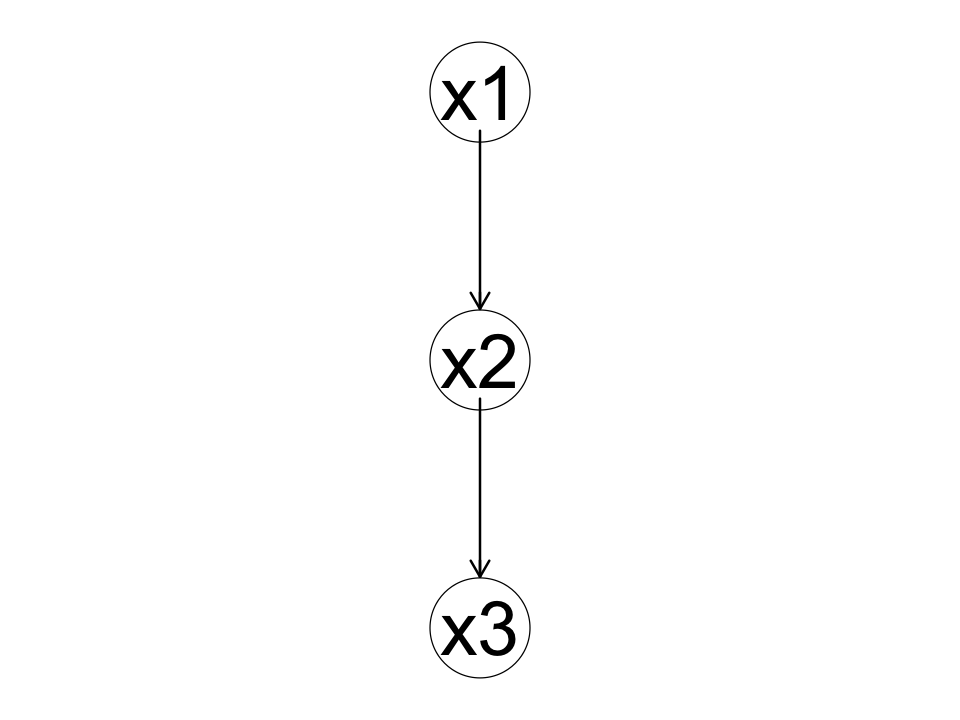

In [13]:
fig(8,6)
plot(net)

## *Testing another algorithm with the previous database: MMHC*
### MMHC ( Max-Min Hill-Climbing) 
                                 ["Tsamardinos et al.", 2006]

The MMHC algorithm combines ideas from local learning, constraint-based, and search-&-score techniques in a principled and effective way. It first reconstructs the skeleton of a Bayesian network and then performs a Bayesian-scoring greedy hill-climbing search to orient the edges.

The basic idea is to use conditional independence test to find the *parents* and *children* node sets of each node and reduce the search space. Then use the "*hill climbing search*" to search for the highest score in the structure space. 

In [14]:
start.time <- Sys.time()

# learn BN object, using MAX-MIN HILL-CLIMBING alghoritm
bnNet <- learn.network(dataset.from.data, algo="MMHC")

#computing the run-time
end.time <- Sys.time()
total.time <- end.time - start.time
cat("TOTAL TIME OF COMPUTATION: \n")
print(total.time)

# print BN characteristics
bnNet

bnstruct :: learning the structure using MMHC ...

bnstruct :: learning using MMHC completed.

bnstruct :: learning network parameters ... 

bnstruct :: parameter learning done.



TOTAL TIME OF COMPUTATION: 
Time difference of 0.01711106 secs



Bayesian Network: BNDataset

num.nodes 3

variables
x1 x2 x3
discreteness
TRUE TRUE TRUE
node.sizes
2 2 2
Adjacency matrix:
   x1 x2 x3
x1  0  0  0
x2  1  0  0
x3  0  1  0

Conditional probability tables:$x1
   x1
x2          1         2
  1 0.7727273 0.2272727
  2 0.2272727 0.7727273

$x2
   x2
x3          1          2
  1 0.9444444 0.05555556
  2 0.1923077 0.80769231

$x3
x3
        1         2 
0.4090909 0.5909091 



### Plot the network

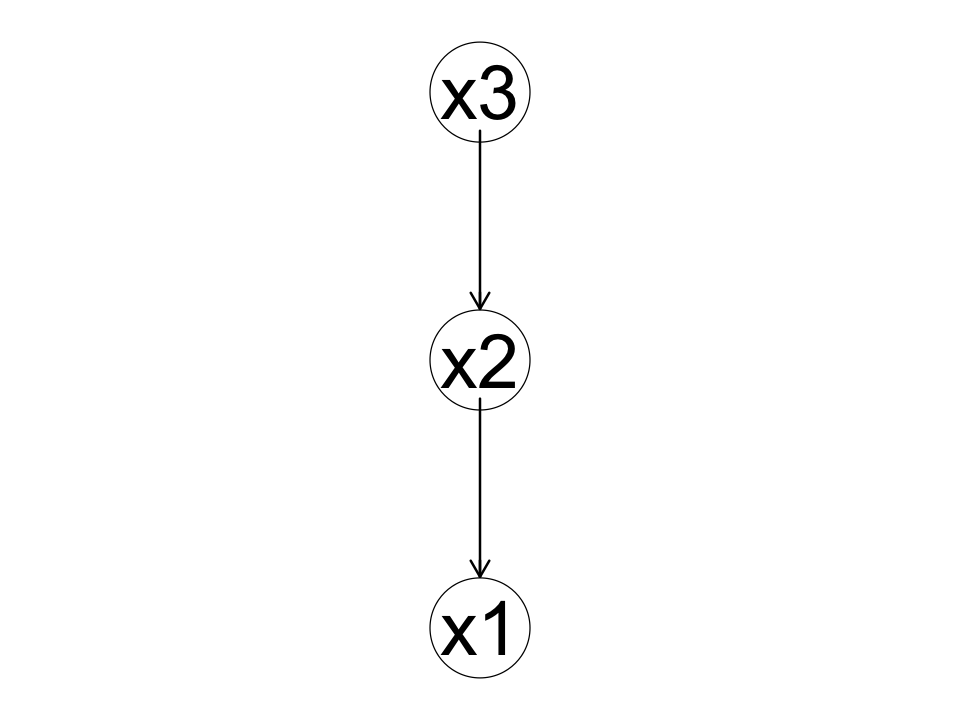

In [15]:
fig(8,6)
plot(bnNet)

# **ALARM dataset**

## *Use of K2 algorithm with ALARM dataset*
- Dataset from http://www.openmarkov.org/learning/datasets/alarm10K.csv
- We use the node order specify in: <br>
G. F. Cooper and E. Herskovits, "*A Bayesian Method for the Induction of Probabilistic Networks from Data*" , Machine Learning 9, (1992) 309

- ALARM dataset contains 8 diagnosis, 16 findings, 13 intermediate variables.

In [16]:
data <- read.table("./Data/dataset/alarm10k.csv", header = TRUE, sep = ",", quote = " \ ", stringsAsFactors = TRUE)
#data <- read.table("alarm10kOK.csv", header = TRUE, sep = ",", quote = " \ ", stringsAsFactors = TRUE)

cat("DATABASE:\n\n")

ordered_col <- c("CVP","PCWP", "HISTORY","TPR","BP","CO","HRBP","HREKG","HRSAT", "PAP",
                 "SAO2", "FIO2","PRESS","EXPCO2","MINVOL","MINVOLSET","HYPOVOLEMIA","LVFAILURE",
                 "ANAPHYLAXIS","INSUFFANESTH","PULMEMBOLUS","INTUBATION","KINKEDTUBE","DISCONNECT",
                 "LVEDVOLUME","STROKEVOLUME","CATECHOL","ERRLOWOUTPUT","HR","ERRCAUTER","SHUNT","PVSAT",
                 "ARTCO2","VENTALV","VENTLUNG","VENTTUBE","VENTMACH")

true_col <- c("CVP","PCWP", "HIST","TPR","BP","CO","HRBP","HREK","HRSA", "PAP", "SAO2", "FIO2","PRSS",
              "ECO2","MINV","MVS","HYP","LVF","APL","ANES","PMB","INT","KINK","DISC","LVV","STKV",
              "CCHL","ERLO","HR","ERCA","SHNT","PVS","ACO2","VALV","VLNG","VTUB","VMCH")

data <- data[ match(ordered_col, names(data)) ]
data


DATABASE:



CVP,PCWP,HISTORY,TPR,BP,CO,HRBP,HREKG,HRSAT,PAP,⋯,ERRLOWOUTPUT,HR,ERRCAUTER,SHUNT,PVSAT,ARTCO2,VENTALV,VENTLUNG,VENTTUBE,VENTMACH
<fct>,<fct>,<lgl>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,⋯,<lgl>,<fct>,<lgl>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>
NORMAL,NORMAL,FALSE,NORMAL,HIGH,HIGH,HIGH,HIGH,HIGH,NORMAL,⋯,FALSE,HIGH,FALSE,NORMAL,HIGH,LOW,HIGH,LOW,ZERO,ZERO
NORMAL,NORMAL,FALSE,NORMAL,LOW,LOW,HIGH,HIGH,HIGH,NORMAL,⋯,FALSE,HIGH,FALSE,NORMAL,LOW,HIGH,ZERO,ZERO,ZERO,HIGH
NORMAL,NORMAL,FALSE,HIGH,NORMAL,LOW,NORMAL,HIGH,HIGH,NORMAL,⋯,FALSE,LOW,FALSE,NORMAL,HIGH,LOW,HIGH,LOW,HIGH,HIGH
NORMAL,NORMAL,FALSE,NORMAL,HIGH,HIGH,HIGH,HIGH,HIGH,LOW,⋯,FALSE,HIGH,FALSE,NORMAL,LOW,HIGH,ZERO,ZERO,LOW,NORMAL
NORMAL,NORMAL,FALSE,HIGH,HIGH,HIGH,HIGH,HIGH,HIGH,LOW,⋯,FALSE,HIGH,FALSE,NORMAL,LOW,HIGH,LOW,ZERO,LOW,NORMAL
LOW,LOW,TRUE,LOW,LOW,LOW,HIGH,NORMAL,NORMAL,NORMAL,⋯,FALSE,HIGH,TRUE,HIGH,LOW,HIGH,ZERO,ZERO,LOW,NORMAL
NORMAL,NORMAL,FALSE,NORMAL,HIGH,HIGH,HIGH,HIGH,HIGH,NORMAL,⋯,FALSE,HIGH,FALSE,NORMAL,LOW,HIGH,ZERO,ZERO,LOW,NORMAL
NORMAL,NORMAL,FALSE,LOW,LOW,HIGH,HIGH,HIGH,HIGH,NORMAL,⋯,FALSE,HIGH,FALSE,NORMAL,LOW,HIGH,ZERO,ZERO,ZERO,ZERO
NORMAL,NORMAL,FALSE,NORMAL,NORMAL,HIGH,HIGH,HIGH,HIGH,LOW,⋯,FALSE,HIGH,FALSE,NORMAL,LOW,HIGH,ZERO,ZERO,LOW,NORMAL


In [17]:
data[] <- lapply(data, as.integer)
str(data)

'data.frame':	10000 obs. of  37 variables:
 $ CVP         : int  3 3 3 3 3 2 3 3 3 3 ...
 $ PCWP        : int  3 3 3 3 3 2 3 3 3 3 ...
 $ HISTORY     : int  0 0 0 0 0 1 0 0 0 0 ...
 $ TPR         : int  3 3 1 3 1 2 3 2 3 3 ...
 $ BP          : int  1 2 3 1 1 2 1 2 3 1 ...
 $ CO          : int  1 2 2 1 1 2 1 1 1 1 ...
 $ HRBP        : int  1 1 3 1 1 1 1 1 1 1 ...
 $ HREKG       : int  1 1 1 1 1 3 1 1 1 1 ...
 $ HRSAT       : int  1 1 1 1 1 3 1 1 1 1 ...
 $ PAP         : int  3 3 3 2 2 3 3 3 2 3 ...
 $ SAO2        : int  1 2 1 2 2 2 2 2 2 2 ...
 $ FIO2        : int  2 2 2 2 2 2 2 2 2 2 ...
 $ PRESS       : int  1 1 2 1 2 2 1 1 2 2 ...
 $ EXPCO2      : int  2 2 2 2 2 2 2 2 2 2 ...
 $ MINVOL      : int  1 4 1 4 3 4 4 4 4 4 ...
 $ MINVOLSET   : int  3 1 1 3 3 3 3 3 3 3 ...
 $ HYPOVOLEMIA : int  0 0 0 0 0 0 0 0 0 0 ...
 $ LVFAILURE   : int  0 0 0 0 0 1 0 0 0 0 ...
 $ ANAPHYLAXIS : int  0 1 0 0 0 0 0 0 0 0 ...
 $ INSUFFANESTH: int  0 0 0 1 0 0 0 0 0 0 ...
 $ PULMEMBOLUS : int  0 0 0 0 0 0 0 0

In [18]:
# list of all possible values of the attribute xi(ordered)
V <- lapply(lapply(data,unique),sort )

# number of possible values for the attribute xi
r <- sapply(V,length) 

In [19]:
n <- 37                                              # number of nodes
Order <- c(12,16,17,18,19,20,21,22,23,24,25,26,28,
           30,31,37,1,2,3,4,10,36,13,35,15,34,32,33,
           11,14,27,29,6,7,8,9,5)                    # ordering on the nodes

u <- 6                                               # upper bound on the number of parents

m <- length(data$HISTORY)                            # number of cases

names <- as.character(1:n)                           # names of the nodes

***Computation of adjacency matrix***

In [20]:
adjMatrix_AN <- K2(print_res=FALSE)



RUNNING K2 ALGORITHM

Node: 1 , Parent of node 1 :  25 
Node: 2 , Parent of node 2 :  25 
Node: 3 , Parent of node 3 :  18 
Node: 4 , Parent of node 4 :  19 
Node: 5 , Parent of node 5 :  4 6 
Node: 6 , Parent of node 6 :  26 29 
Node: 7 , Parent of node 7 :  28 29 
Node: 8 , Parent of node 8 :  29 30 
Node: 9 , Parent of node 9 :  8 29 30 
Node: 10 , Parent of node 10 :  21 
Node: 11 , Parent of node 11 :  31 32 
Node: 12 , Parent of node 12 :  
Node: 13 , Parent of node 13 :  22 23 36 
Node: 14 , Parent of node 14 :  33 35 
Node: 15 , Parent of node 15 :  22 35 
Node: 16 , Parent of node 16 :  
Node: 17 , Parent of node 17 :  
Node: 18 , Parent of node 18 :  
Node: 19 , Parent of node 19 :  
Node: 20 , Parent of node 20 :  
Node: 21 , Parent of node 21 :  
Node: 22 , Parent of node 22 :  
Node: 23 , Parent of node 23 :  
Node: 24 , Parent of node 24 :  
Node: 25 , Parent of node 25 :  17 18 
Node: 26 , Parent of node 26 :  17 18 25 
Node: 27 , Parent of node 27 :  4 11 33 
Node: 28

In [21]:
# BNDataset object creation
dataset.from.data <- suppressWarnings( BNDataset(data = data, discreteness = rep(TRUE,n), variables = names, node.sizes = (r+1) , starts.from=0))

# BN object creation
alarmNet <- BN(dataset.from.data)         #  <---- REMOVE COMMENT IF NOT ALREADY LOADED

# add the adjacency matrix to the BN object
dag(alarmNet) <- as.matrix(adjMatrix_AN)      #     <---- REMOVE COMMENT IF NOT ALREADY LOADED

# given the structure obtained by K2-algorithm, we learn the network probabilities 
alarmNet <- learn.params(alarmNet, dataset.from.data)

# print BN characteristics
alarmNet                                   #     <---- REMOVE COMMENT IF NOT ALREADY LOADED

bnstruct :: learning network parameters ... 

Warning message in validityMethod(object):
“ Not all of the possible values have been observed for variables  1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37”
bnstruct :: parameter learning done.




Bayesian Network: BNDataset

num.nodes 37

variables
1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37
discreteness
TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE
node.sizes
4 4 3 4 4 4 4 4 4 4 4 3 5 5 5 4 3 3 3 3 3 4 3 3 4 4 3 3 4 3 3 4 4 5 5 5 5
Adjacency matrix:
   1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28
1  0 0 0 0 0 0 0 0 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
2  0 0 0 0 0 0 0 0 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
3  0 0 0 0 0 0 0 0 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
4  0 0 0 0 1 0 0 0 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  1  0
5  0 0 0 0 0 0 0 0 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
6  0 0 0 0 1 0 0 0 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0 

In [22]:
save(adjMatrix_AN,file = "./Data/adjMatrix_AN.RData")
save(alarmNet,file = "./Data/alarmNet.RData")

## *Loading BN of ALARM dataset*

In [23]:
load(file = "./Data/adjMatrix_AN.RData")
load(file = "./Data/alarmNet.RData")

### Plot the network

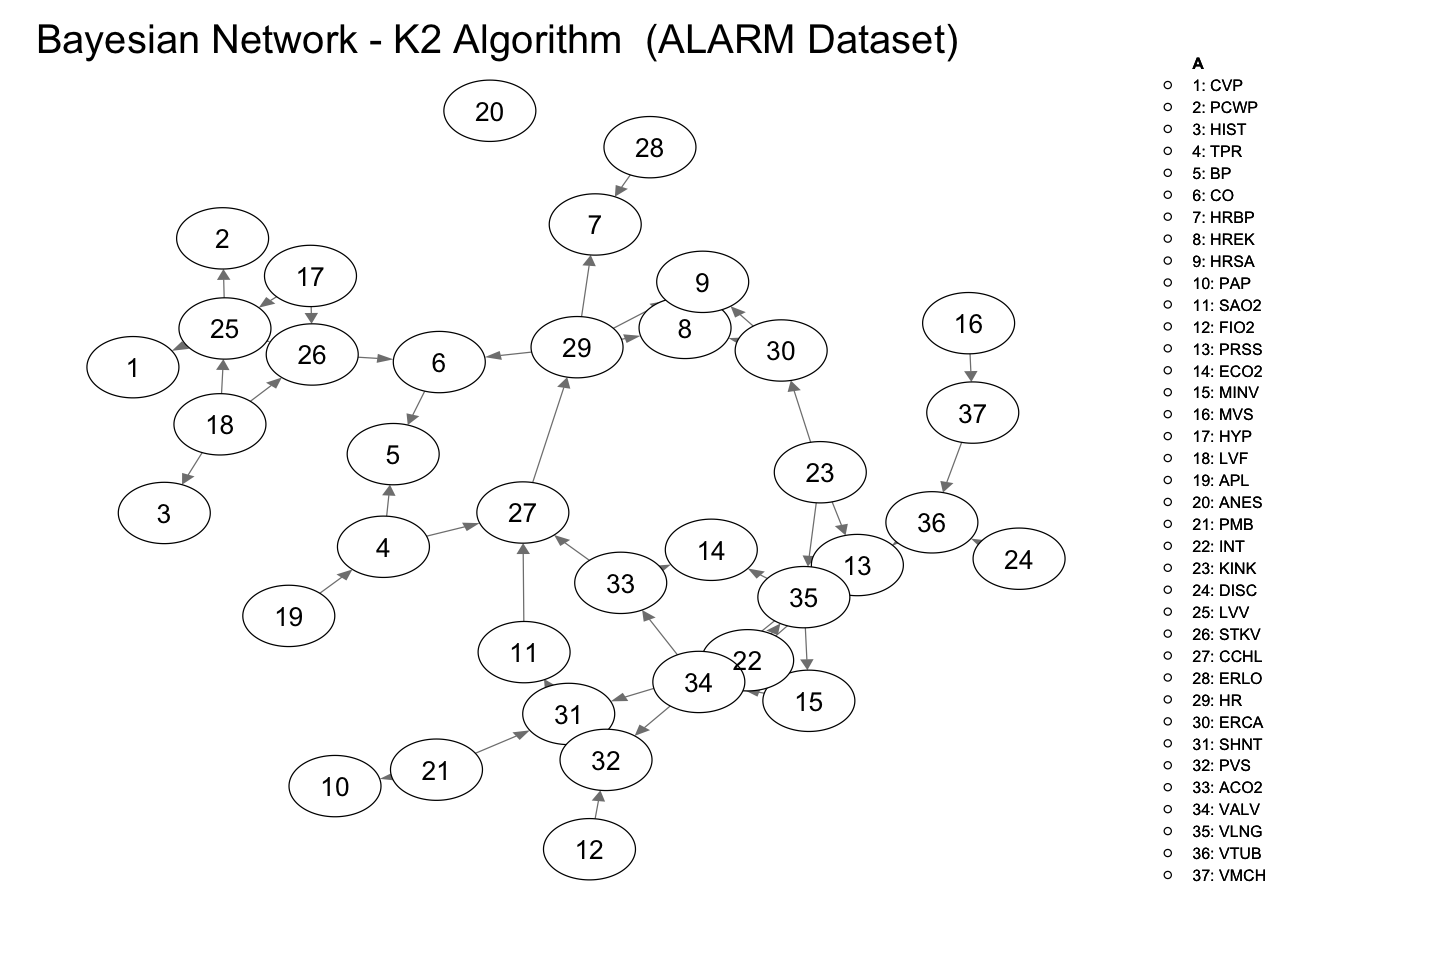

In [24]:
fig(12,8)
#plot(alarmNet)

plot(alarmNet, method = "qgraph", title.cex= 2,
     title = "Bayesian Network - K2 Algorithm  (ALARM Dataset) ",
     labels=names, label.cex = 1.5,
     legend=TRUE,legend.cex=0.4, legend.mode="style1", nodeNames=true_col, GLratio = 4)



**Differences with hand-work** : <br>
Missing connection between: 20-27<br>
Adding connection between : 23-30 , 15-34


## *MMHC-algorithm on ALARM dataset*

In [25]:
start.time <- Sys.time()

# learn BN object, using MAX-MIN HILL-CLIMBING alghoritm
bnNet1 <- learn.network(dataset.from.data, algo="MMHC")
 
#computing the run-time
end.time <- Sys.time()
total.time <- end.time - start.time
cat("ALARM dataset with MMHC-algorithm:\n\nTOTAL TIME OF COMPUTATION: \n")
print(total.time)

bnstruct :: learning the structure using MMHC ...

bnstruct :: learning using MMHC completed.

bnstruct :: learning network parameters ... 

Warning message in validityMethod(object):
“ Not all of the possible values have been observed for variables  1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37”
bnstruct :: parameter learning done.



ALARM dataset with MMHC-algorithm:

TOTAL TIME OF COMPUTATION: 
Time difference of 5.997018 secs


### Plot the network

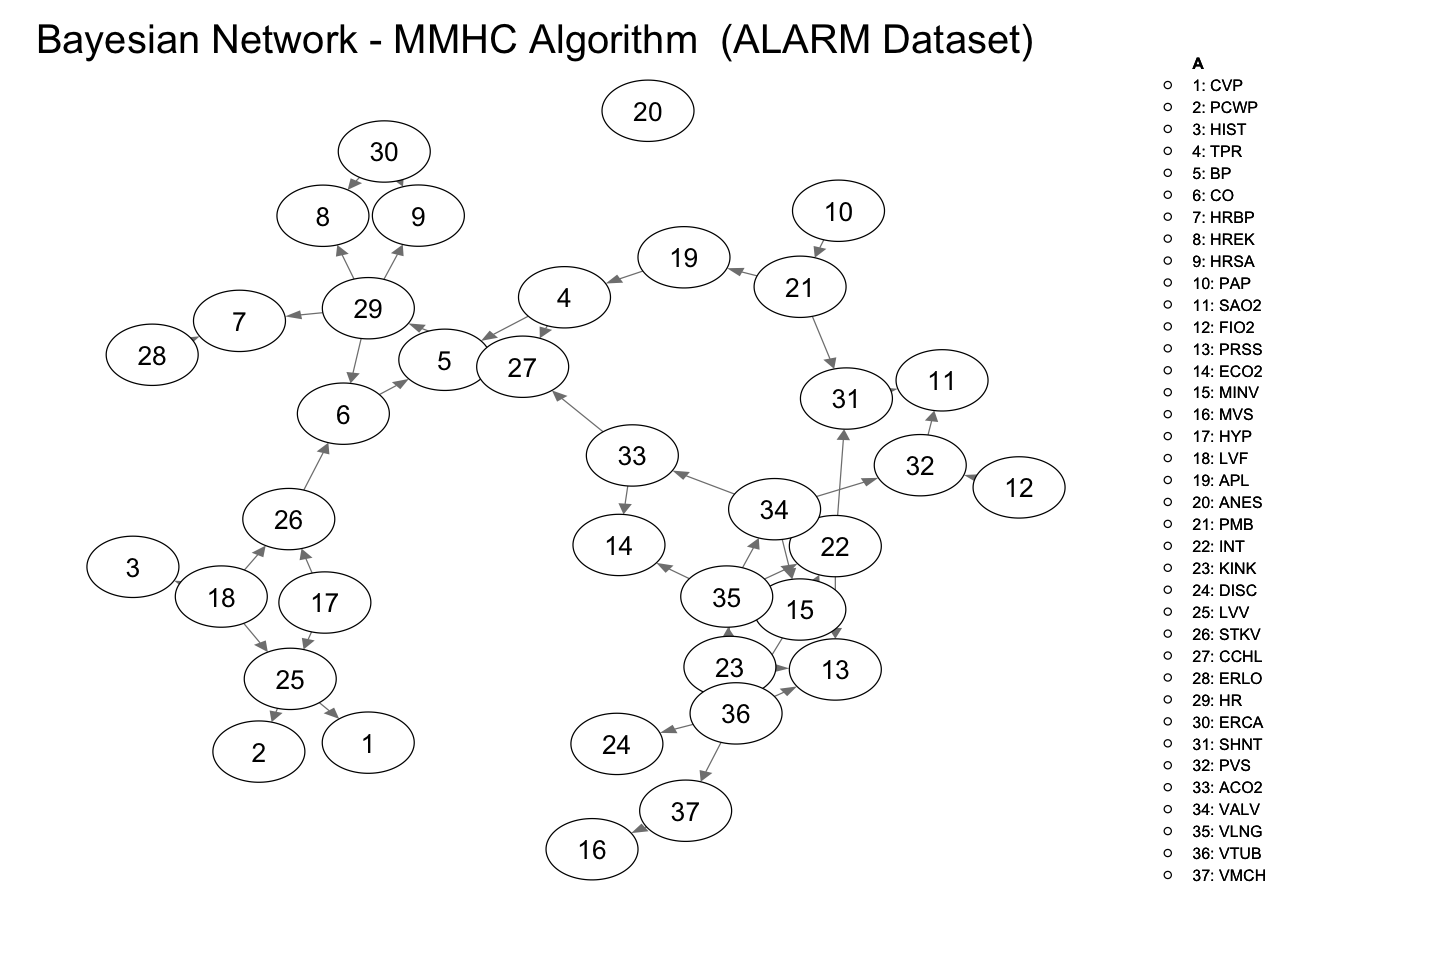

In [26]:
fig(12,8)
plot(bnNet1, method = "qgraph", title.cex= 2,
     title = "Bayesian Network - MMHC Algorithm  (ALARM Dataset) ",
     labels = names, label.cex = 1.5,
     legend = TRUE,legend.cex = 0.4, legend.mode = "style1", nodeNames = true_col, GLratio = 4)

**Differences with hand-work** : <br>
Wrong direction: 10-21 16-37 24-36 ..<br>
Missing: 11-27 20-27 11-27 27-29 .. <br>
Wrong : 21-19 22-13  ..<br>

# **ASIA dataset**

## *Use of K2 algorithm with ASIA dataset*

- Dataset from http://www.openmarkov.org/learning/datasets/asia10K.csv

In [27]:
data <- read.table("./Data/dataset/asia10K.csv", header = TRUE, sep = ",", quote = " \ ", stringsAsFactors = TRUE)

cat("DATABASE:\n\n")
head(data,10)


DATABASE:



,Smoker,LungCancer,VisitToAsia,Tuberculosis,TuberculosisOrCancer,X.ray,Bronchitis,Dyspnea
,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>
1,yes,yes,no,no,yes,yes,yes,yes
2,no,no,no,no,no,yes,yes,yes
3,no,no,no,no,no,no,yes,yes
4,no,no,no,no,no,no,yes,yes
5,yes,no,no,no,no,no,yes,no
6,yes,no,no,no,no,no,yes,yes
7,no,no,no,no,no,no,no,no
8,yes,no,no,no,no,no,yes,yes
9,no,no,no,no,no,no,no,yes


In [28]:
data[] <- lapply(data, as.integer)
str(data)

'data.frame':	10000 obs. of  8 variables:
 $ Smoker              : int  2 1 1 1 2 2 1 2 1 1 ...
 $ LungCancer          : int  2 1 1 1 1 1 1 1 1 1 ...
 $ VisitToAsia         : int  1 1 1 1 1 1 1 1 1 1 ...
 $ Tuberculosis        : int  1 1 1 1 1 1 1 1 1 1 ...
 $ TuberculosisOrCancer: int  2 1 1 1 1 1 1 1 1 1 ...
 $ X.ray               : int  2 2 1 1 1 1 1 1 1 1 ...
 $ Bronchitis          : int  2 2 2 2 2 2 1 2 1 2 ...
 $ Dyspnea             : int  2 2 2 2 1 2 1 2 2 2 ...


In [29]:
# list of all possible values of the attribute xi(ordered)
V <- lapply(lapply(data,unique),sort )

# number of possible values for the attribute xi
r <- sapply(V,length) 

**We would expect that "Smoking", "Xray" and "Asia" should be on top of the graph becouse we think them to be the "causes."**

In [30]:
n <- length(r)                                       # number of nodes
Order <- c(1,6,3,4,5,7,8,2)                          # ordering on the nodes

u <- 4                                               # upper bound on the number of parents

m <- length(data$HISTORY)                            # number of cases

names <- names(data)                                 # names of the nodes

names = c("Smoker" , "Lung\nCancer", 'Visit\nTo\nAsia',"Tuberculosis", "Tubercolosis\nor\nCancer","X.ray", "Bronchitis", "Dyspnea")

In [31]:
adjMatrix_a <- K2(print_res=FALSE)



RUNNING K2 ALGORITHM

Node: 1 , Parent of node 1 :  
Node: 2 , Parent of node 2 :  4 5 
Node: 3 , Parent of node 3 :  
Node: 4 , Parent of node 4 :  3 6 
Node: 5 , Parent of node 5 :  1 4 6 
Node: 6 , Parent of node 6 :  1 
Node: 7 , Parent of node 7 :  1 
Node: 8 , Parent of node 8 :  5 7 

TOTAL TIME OF COMPUTATION: 
Time difference of 1.766327 secs


In [32]:
# BNDataset object creation
dataset.from.data <- suppressWarnings( BNDataset(data = data, discreteness = rep(TRUE,n), variables = names, node.sizes = (r+1) , starts.from=0))

# BN object creation
asiaNet <- BN(dataset.from.data)

# add the adjacency matrix to the BN object
dag(asiaNet) <- as.matrix(adjMatrix_a)

# given the structure obtained by K2-algorithm, we learn the network probabilities 
asiaNet <- learn.params(asiaNet, dataset.from.data)

bnstruct :: learning network parameters ... 

Warning message in validityMethod(object):
“ Not all of the possible values have been observed for variables  1 2 3 4 5 6 7 8”
bnstruct :: parameter learning done.



### Plot the network (ASIA dataset)

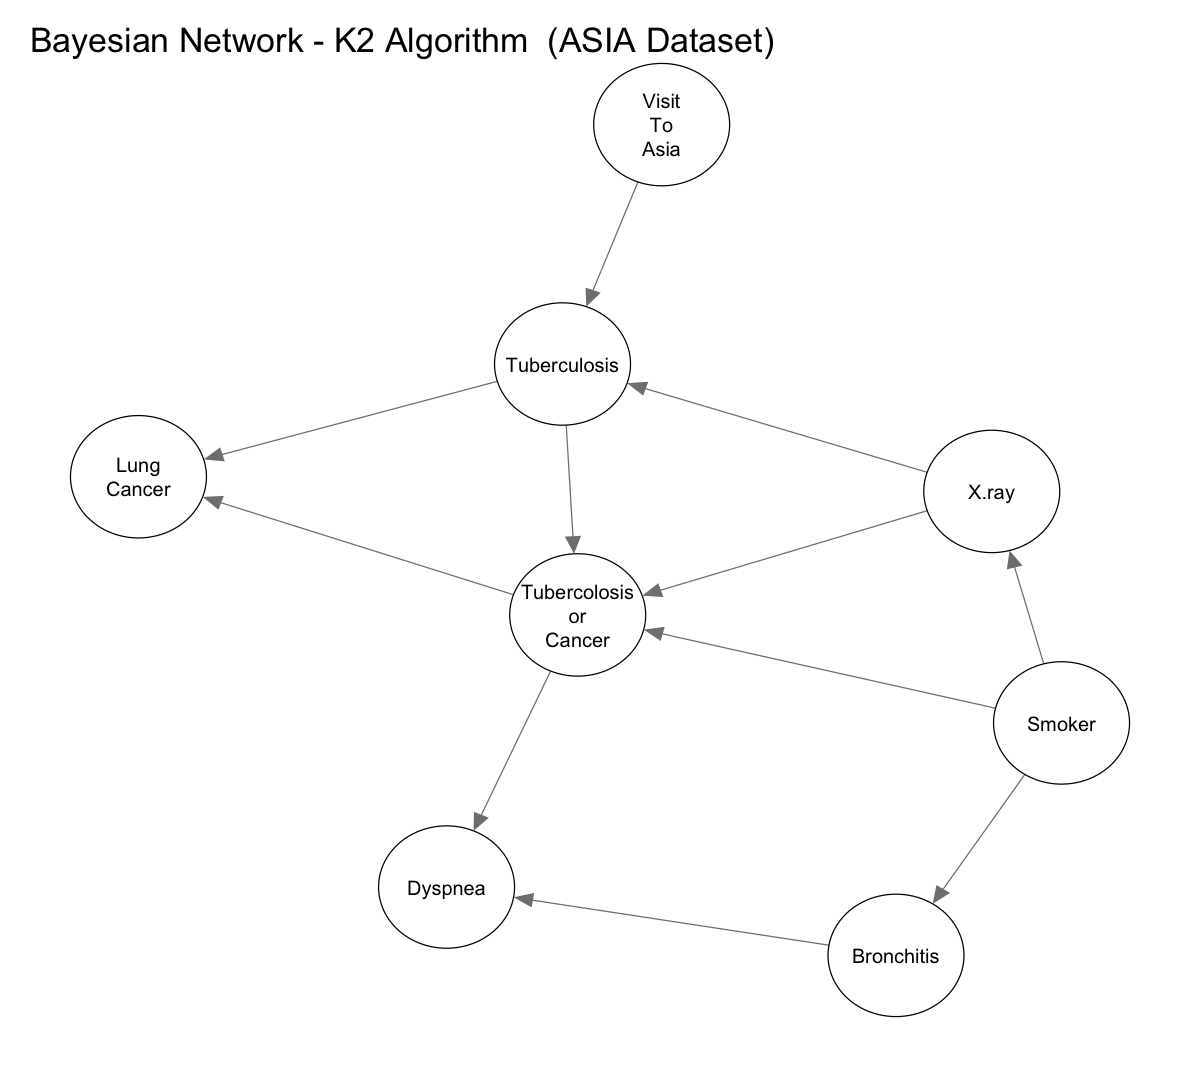

In [33]:
fig(10,9)

plot(asiaNet, method = "qgraph", title.cex= 1.7,
     title = "Bayesian Network - K2 Algorithm  (ASIA Dataset) ",
     labels=names, label.cex = 1, node.width=1.3, label.scale = FALSE)


## *Different node ordering ( K2-algorithm on ASIA dataset )*

Here too, we have done the same thing as before in ALARM dataset, repeating the procedure for some random initial node's order.

In [34]:
BNas <- list()
adj_MTX_asia <- list()

# ---- Do for 10 random order of nodes ------
for (i in (1:10)){

    Order <- sample(1:8,8,replace = FALSE)
    cat("\n\n", i,") coloumns order:", Order, "\n")
    adjMatrix_asia <- K2(print_res=FALSE) 
    
    adj_MTX_asia[[i]] <- adjMatrix_asia
    
    # BNDataset object creation
    dataMat <- as.matrix(data)
    dataset.from.data <- suppressWarnings( BNDataset(data = data, discreteness = rep(TRUE,n), variables = names, node.sizes = r+1, starts.from=0))

    # BN object creation
    asiaNet <- BN(dataset.from.data)

    # add the adjacency matrix to the BN object
    dag(asiaNet) <- as.matrix(adjMatrix_asia)
    
    BNas[[i]] <- asiaNet
}

names(BNas) <- paste0("test_",seq(1,10))



 1 ) coloumns order: 6 1 4 7 2 5 3 8 


RUNNING K2 ALGORITHM

Node: 1 , Parent of node 1 :  6 
Node: 2 , Parent of node 2 :  1 4 6 
Node: 3 , Parent of node 3 :  4 
Node: 4 , Parent of node 4 :  1 6 
Node: 5 , Parent of node 5 :  2 4 
Node: 6 , Parent of node 6 :  
Node: 7 , Parent of node 7 :  1 
Node: 8 , Parent of node 8 :  5 7 

TOTAL TIME OF COMPUTATION: 
Time difference of 1.563512 secs


 2 ) coloumns order: 6 2 3 8 1 4 5 7 


RUNNING K2 ALGORITHM

Node: 1 , Parent of node 1 :  2 8 
Node: 2 , Parent of node 2 :  6 
Node: 3 , Parent of node 3 :  
Node: 4 , Parent of node 4 :  2 3 6 8 
Node: 5 , Parent of node 5 :  2 4 
Node: 6 , Parent of node 6 :  
Node: 7 , Parent of node 7 :  1 5 8 
Node: 8 , Parent of node 8 :  2 6 

TOTAL TIME OF COMPUTATION: 
Time difference of 2.569962 secs


 3 ) coloumns order: 6 8 2 1 3 5 4 7 


RUNNING K2 ALGORITHM

Node: 1 , Parent of node 1 :  2 8 
Node: 2 , Parent of node 2 :  6 8 
Node: 3 , Parent of node 3 :  
Node: 4 , Parent of node 4 :  2 5 


### Plots some networks (ASIA dataset)

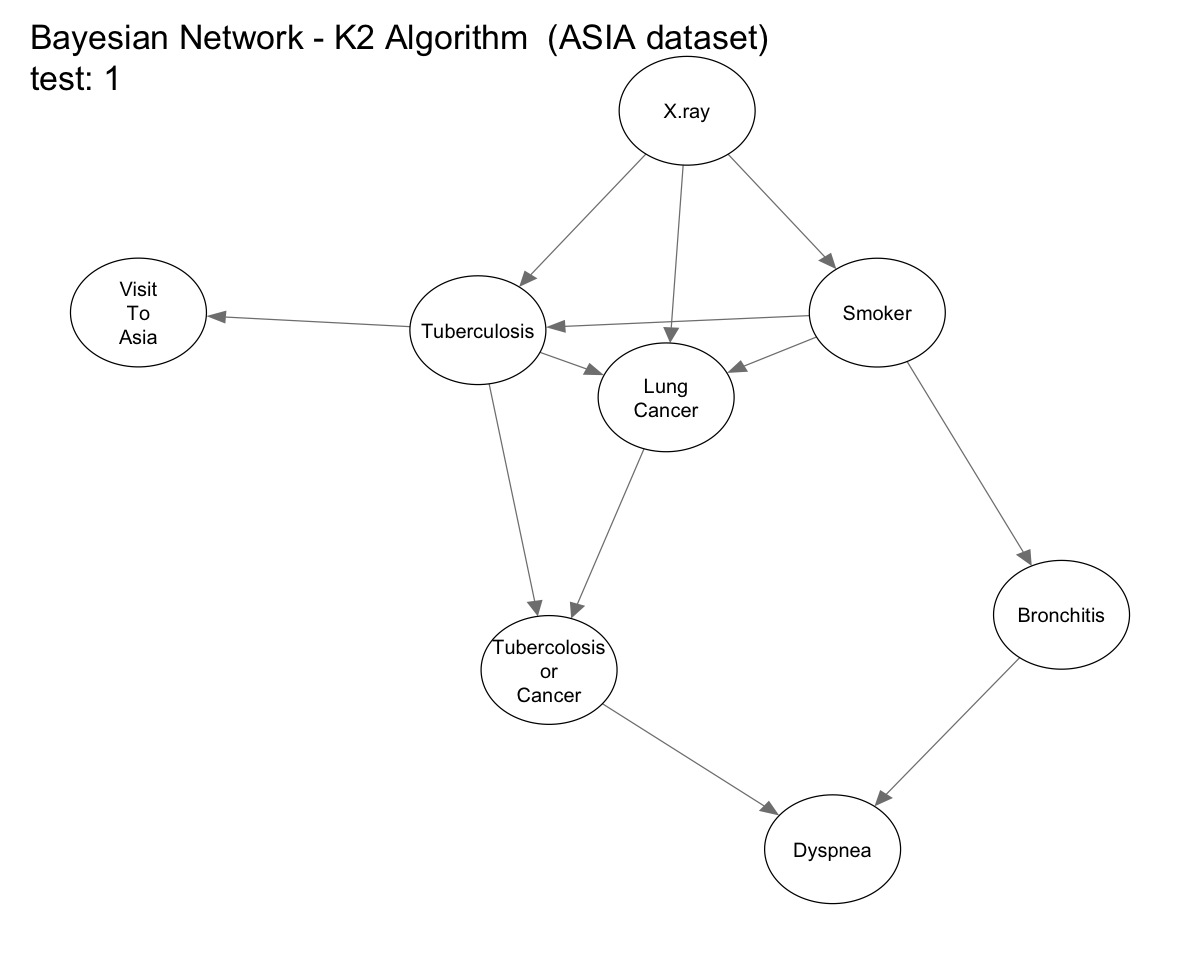

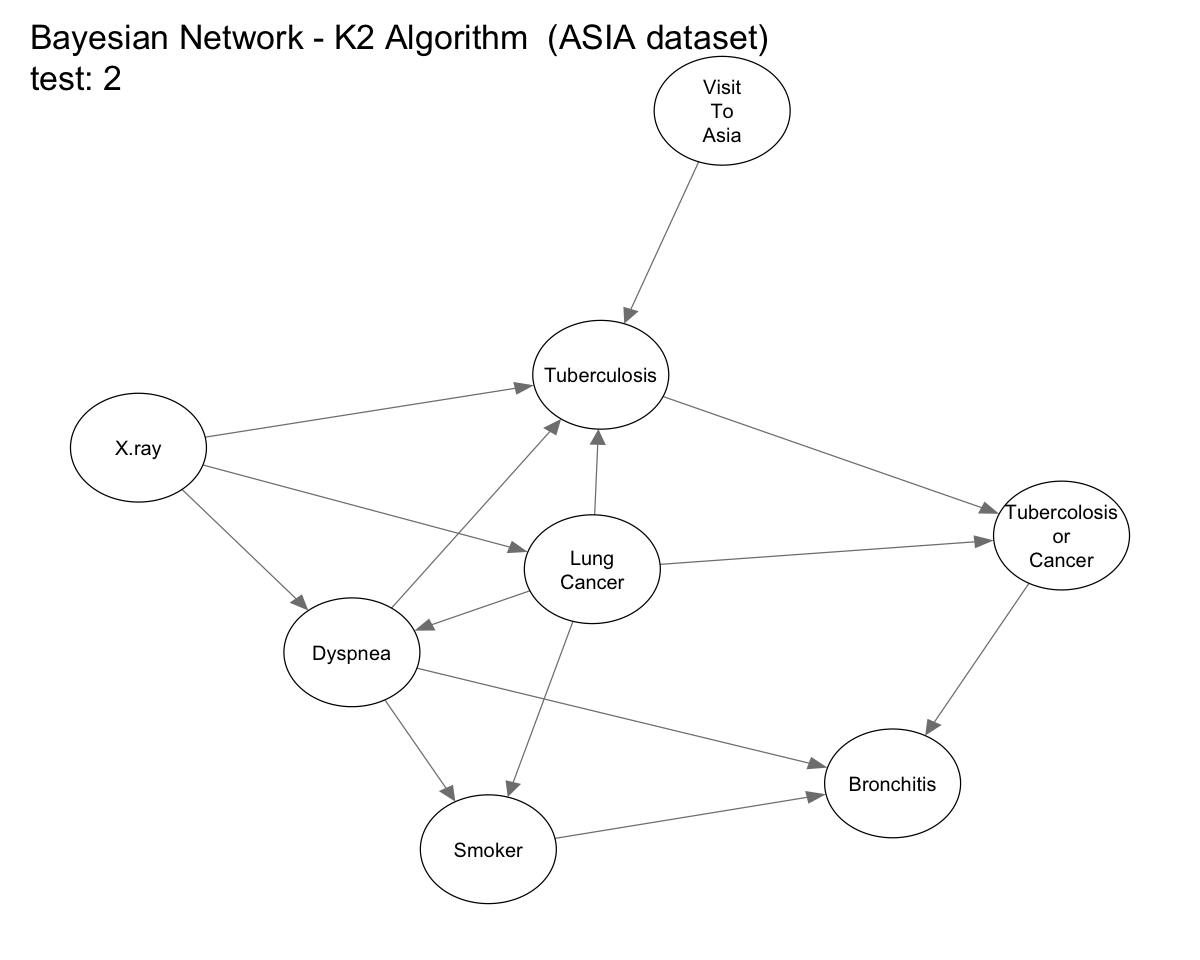

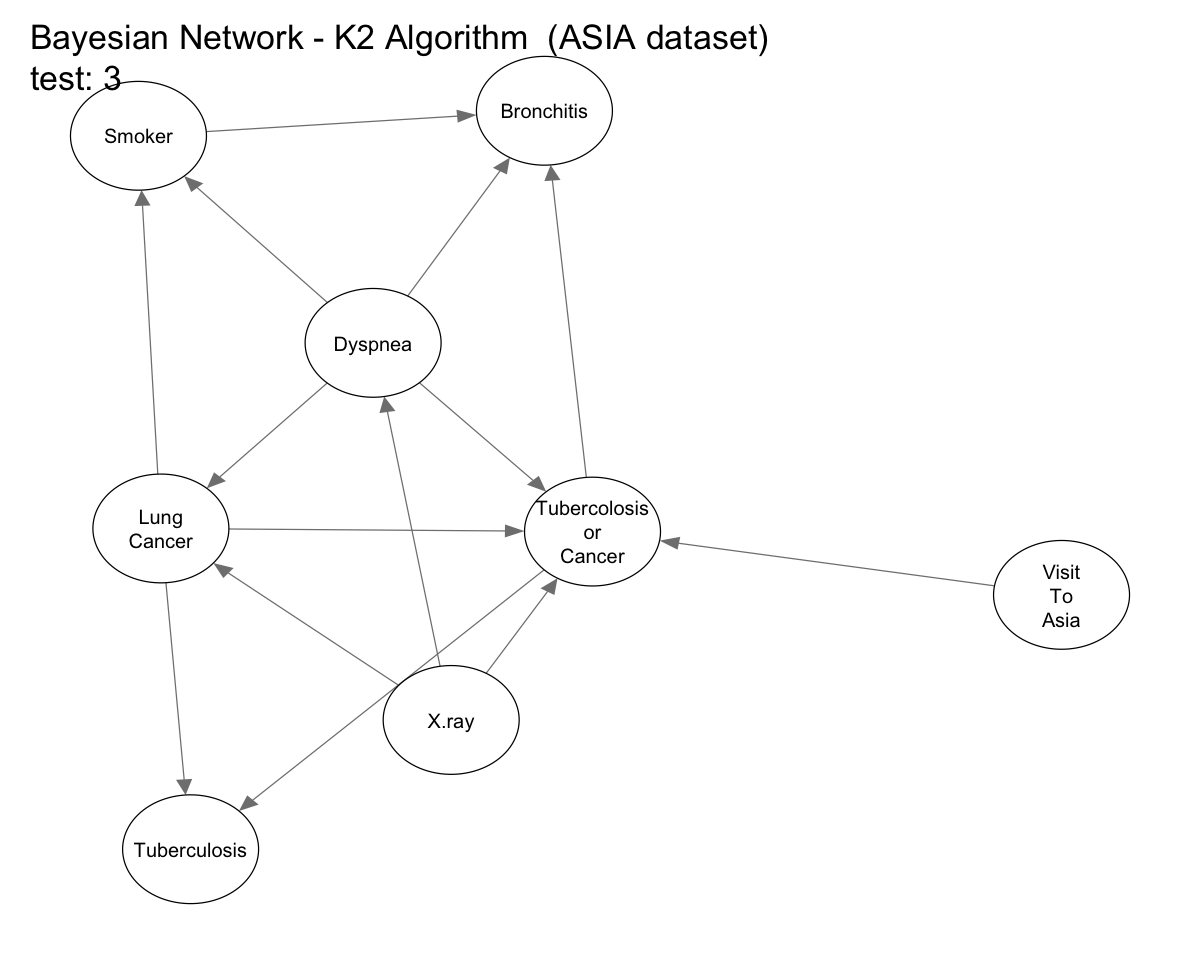

In [35]:
fig(10,8)
#par(mfrow=c(5,2))

for (i in 1:3){
    #plot(BNas[[i]],  node.size.lab = 30)
    plot(BNas[[i]], method = "qgraph", title.cex = 1.7,
     title = paste("Bayesian Network - K2 Algorithm  (ASIA dataset) \ntest:",i),
     labels = names, label.cex = 1, node.width = 1.3, label.scale = FALSE)
    }


## *MMHC-algorithm on ASIA dataset*

In [36]:
start.time <- Sys.time()

bnNet <- learn.network(dataset.from.data, algo="MMHC") 

#computing the run-time
end.time <- Sys.time()
total.time <- end.time - start.time
cat("ASIA dataset with MMHC-algorithm:\n\nTOTAL TIME OF COMPUTATION: \n")
print(total.time)

bnstruct :: learning the structure using MMHC ...

bnstruct :: learning using MMHC completed.

bnstruct :: learning network parameters ... 

Warning message in validityMethod(object):
“ Not all of the possible values have been observed for variables  1 2 3 4 5 6 7 8”
bnstruct :: parameter learning done.



ASIA dataset with MMHC-algorithm:

TOTAL TIME OF COMPUTATION: 
Time difference of 0.05443215 secs


### Plot the network

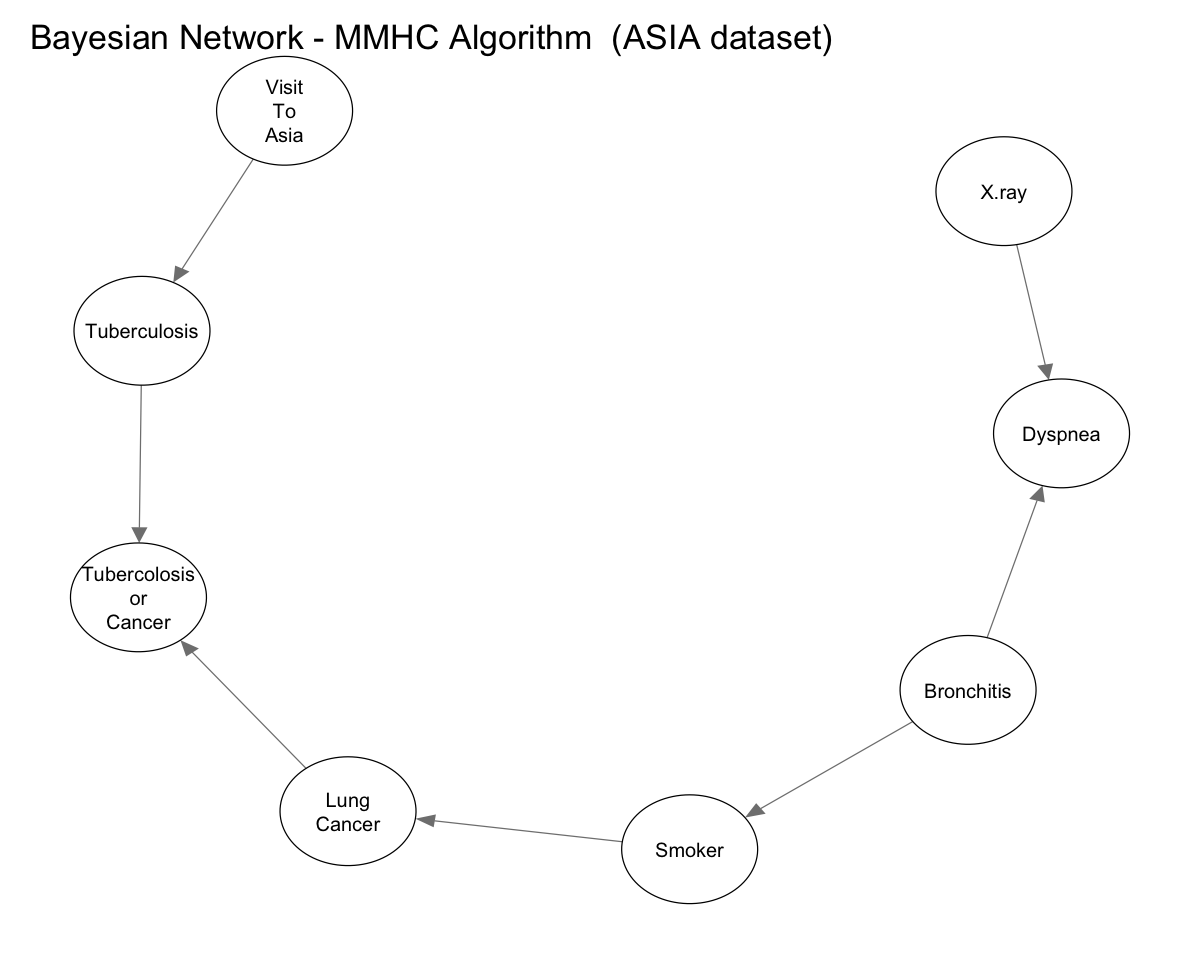

In [37]:
plot(bnNet, method = "qgraph", title.cex = 1.7,
     title = "Bayesian Network - MMHC Algorithm  (ASIA dataset) ",
     labels = names, label.cex = 1, node.width = 1.3, label.scale = FALSE)
